# 01. Importing Libraries & Datasets

In [1]:
#Importing necessary libraries to verify/clean data and setting display options to be able to view all

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Note about matplotlib:
There are certain bugs associated with some versions of matplotlib. Before you start your analysis, you should check what version you have by typing matplotlib.__version__ in a Jupyter cell and executing it. If it shows version 3.1.1, you'll likely experience some problems with the way the heatmap appears.

To circumvent this, we recommend opening a new Anaconda terminal and executing this command: conda update --all. This will update all of your packages and install the newest version of matplotlib, where this bug has been fixed.

Then, restart the kernel for your notebook (so it can pick up any changes to your library versions) and rerun your code, which will re-import the libraries in your notebook. Check the version again, and you should have the latest version installed.

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
#This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#Defining path

path = r'C:/Users/Jonathan/Desktop/Amsterdam AirBnB'

In [5]:
#import dataset

listdetail = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_details_clean.csv'), index_col = False)

In [6]:
#checking details of dataset

listdetail.shape

(20030, 87)

In [7]:
listdetail.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 87, dtype: object

In [8]:
listdetail.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,10.0,f,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,9.0,f,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,9.0,f,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,10.0,f,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,10.0,f,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


# 02. Data Cleaning

In [9]:
#Create a dataframe with only relevant information

relations = listdetail.filter(['price', 'number_of_reviews', 'review_scores_rating', 'bathrooms', 'bedrooms', 'availability_365', 'host_total_listings_count'], axis=1)

In [10]:
relations.head()

,price,number_of_reviews,review_scores_rating,bathrooms,bedrooms,availability_365,host_total_listings_count
0,$59.00,248,97.0,1.5,1.0,44,1.0
1,$160.00,42,96.0,1.0,2.0,47,1.0
2,$80.00,233,87.0,1.0,1.0,198,2.0
3,$125.00,1,100.0,1.0,1.0,141,2.0
4,$150.00,171,99.0,1.0,1.0,199,1.0


In [11]:
#convert 'price' to int64 dtype

relations['price'] = relations['price'].str.replace('$', '')

relations['price'] = relations['price'].str.replace(',', '')

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_22360\3997828205.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  relations['price'] = relations['price'].str.replace('$', '')


In [12]:
relations['price'] = relations['price'].astype(float)

In [13]:
relations.describe()

,price,number_of_reviews,review_scores_rating,bathrooms,bedrooms,availability_365,host_total_listings_count
count,20030.000000,20030.000000,17391.000000,20020.000000,20022.00000,20030.000000,20026.000000
mean,152.181178,21.560459,94.849520,1.137662,1.44506,59.913679,6.105812
std,145.828976,43.240292,6.648685,0.793903,0.88568,104.027710,30.388516
min,0.000000,0.000000,20.000000,0.000000,0.00000,0.000000,0.000000
25%,96.000000,3.000000,93.000000,1.000000,1.00000,0.000000,1.000000
50%,125.000000,8.000000,97.000000,1.000000,1.00000,3.000000,1.000000
75%,175.000000,22.000000,100.000000,1.000000,2.00000,67.000000,1.000000
max,8500.000000,695.000000,100.000000,100.500000,12.00000,365.000000,698.000000


# 03. Exploring Relationships

Correlation Matrix: 

In [14]:
#Create a correlation matrix using pandas

relations.corr()

,price,number_of_reviews,review_scores_rating,bathrooms,bedrooms,availability_365,host_total_listings_count
price,1.000000,-0.067417,0.029618,0.101141,0.309223,0.159293,0.083609
number_of_reviews,-0.067417,1.000000,0.005914,-0.012965,-0.104086,0.252856,-0.049402
review_scores_rating,0.029618,0.005914,1.000000,0.011780,0.017490,-0.020239,-0.134096
bathrooms,0.101141,-0.012965,0.011780,1.000000,0.187551,0.004656,0.023983
bedrooms,0.309223,-0.104086,0.017490,0.187551,1.000000,-0.008886,0.024682
availability_365,0.159293,0.252856,-0.020239,0.004656,-0.008886,1.000000,0.089960
host_total_listings_count,0.083609,-0.049402,-0.134096,0.023983,0.024682,0.089960,1.000000


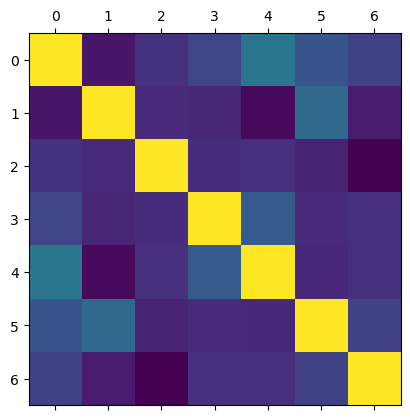

In [15]:
#Create a correlation heatmap using matplotlib

plt.matshow(relations.corr())
plt.show()

In [16]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Jonathan\\Desktop\\Amsterdam AirBnB\\03 Scripts'

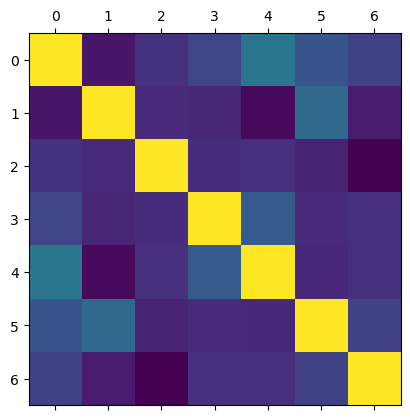

In [17]:
# Save figure
plt.matshow(relations.corr())
plt.savefig("out.png")

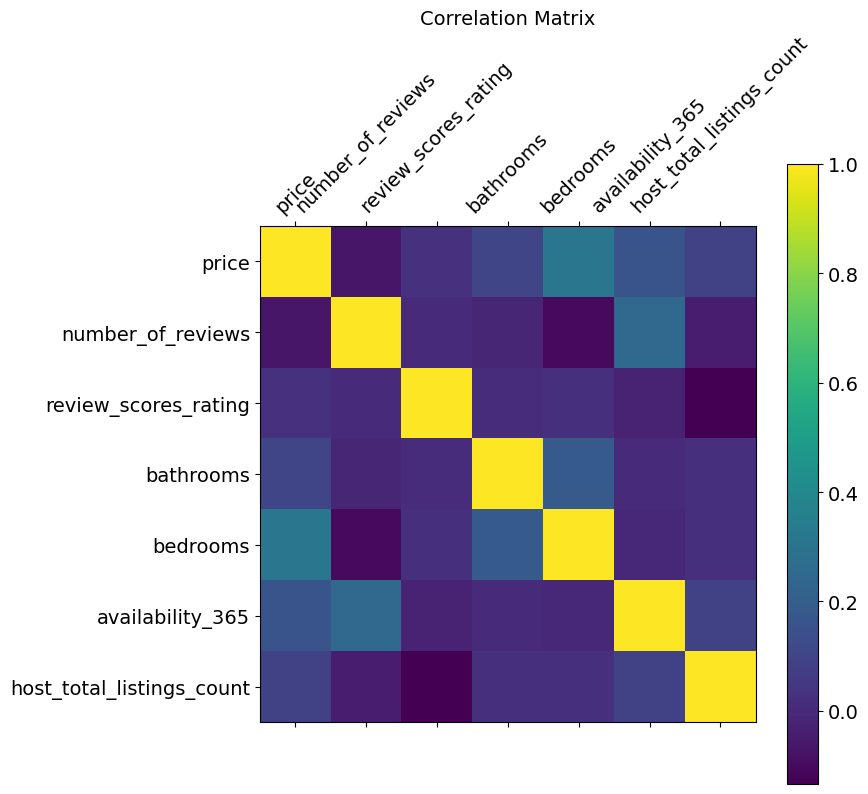

In [18]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(relations.corr(), fignum=f.number) # type of plot
plt.xticks(range(relations.shape[1]), relations.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(relations.shape[1]), relations.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig("Correlation Matrix.png") 

Correlation Heatmap:

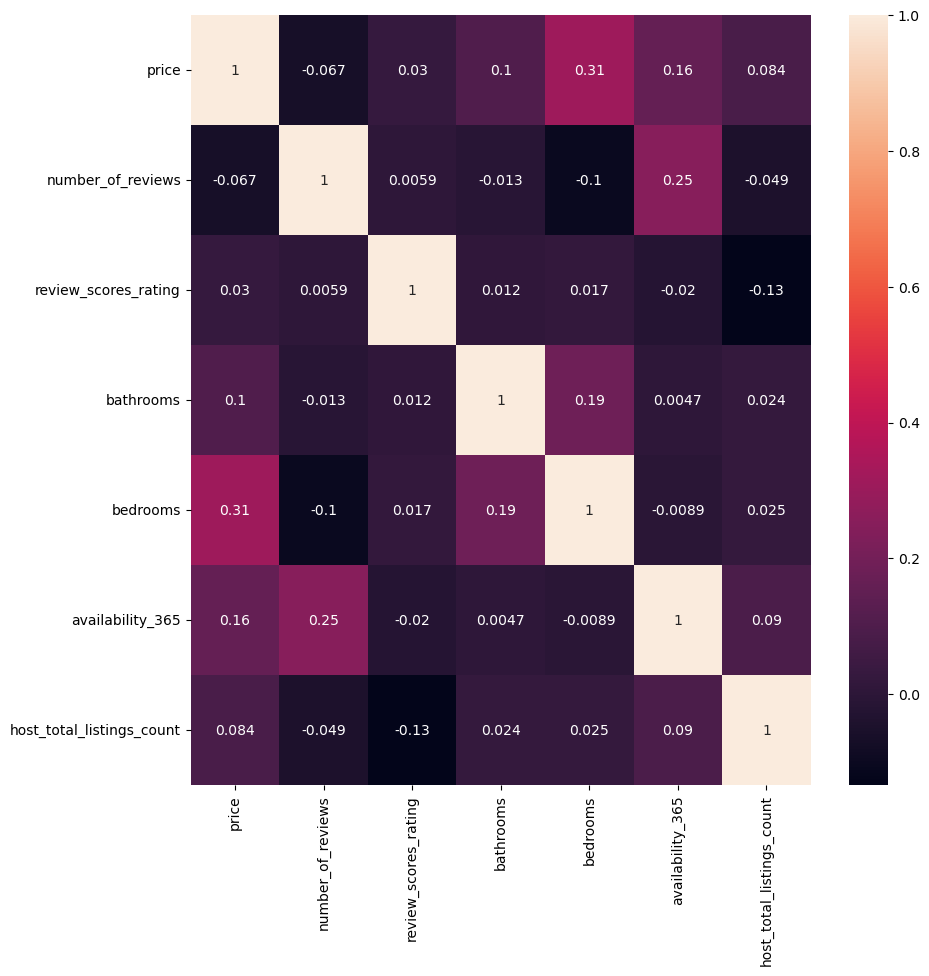

In [19]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

#Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(relations.corr(), annot = True, ax = ax) 
#The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
plt.savefig("Correlation Heatmap.png") 

#The coefficients in the plot describe the strength of correlation between the two variables where the squares intersect. For example if we look at (ignoring the 1s which indicate a strong positive correlation) the coefficient for the 'price' and bedrooms variables we can see that it is a 0.31 correlation coefficient. This means that there is a moderately positive relationship between the two variables (as # of bedrooms go up so does the price of the listing to a moderate degree). For a majority of these variables compared there is anywhere from basically no relationship to a weak relationship. 

Scatterplot:

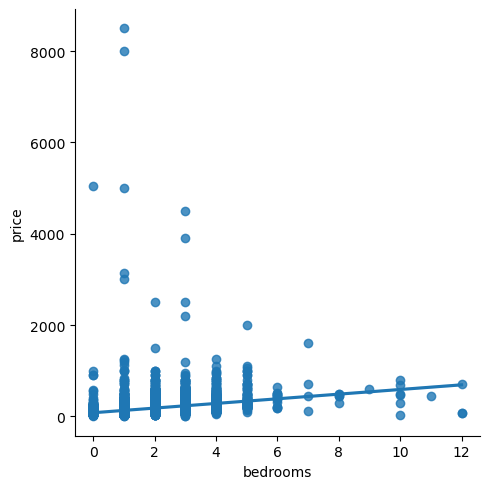

In [20]:
#Create a scatterplot for the "bedrooms" and "price" columns in seaborn

sns.lmplot(x = 'bedrooms', y = 'price', data = relations)

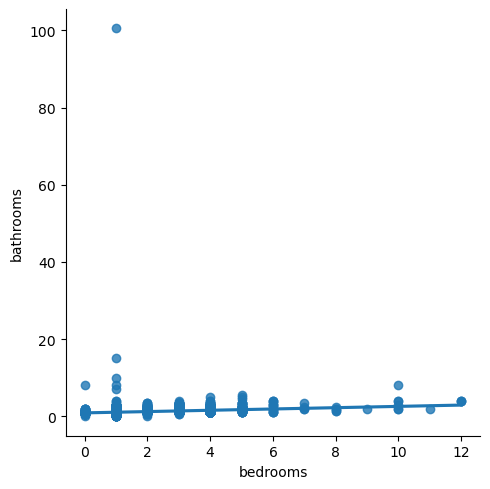

In [21]:
#Create a scatterplot for the "bedrooms" and "bathrooms" columns in seaborn

sns.lmplot(x = 'bedrooms', y = 'bathrooms', data = relations)

Pair Plot:

In [22]:
#Keep only the variables you want to use in the pair plot

relations_2 = relations[['price', 'number_of_reviews', 'review_scores_rating', 'availability_365', 'host_total_listings_count']]

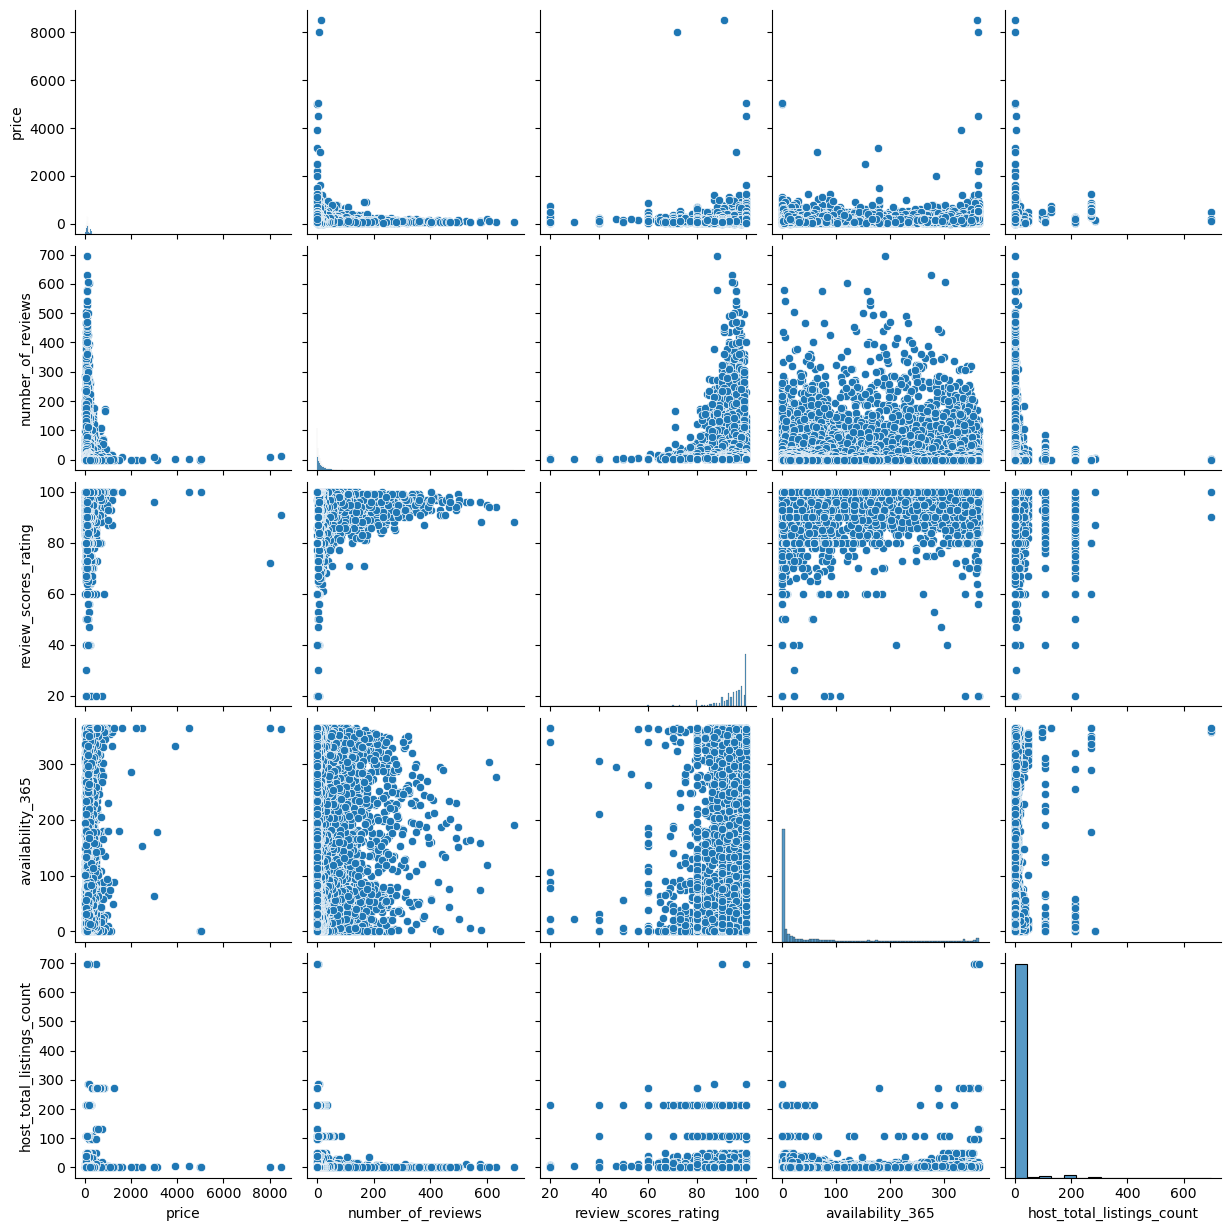

In [23]:
#Create a pair plot

pairplot = sns.pairplot(relations_2)

Some interesting things we can note from the pair plot include most listings being priced generally lower with only some outliers like those that were priced $8000+. I would like to investigate the relationship between of reviews ratings and number of reviews. From the pair plot we can see that reveiw scores are clustered mostly at 80+ no matter the number of reviews but there are not any listings scored lower than 80 when you reach a certain number of reviews. Another thing to investigate would be the availability with other variables including host_total_listings_count, number of reviews, and review_scores_rating.

Categorical plot:

<Axes: xlabel='number_of_reviews', ylabel='Count'>

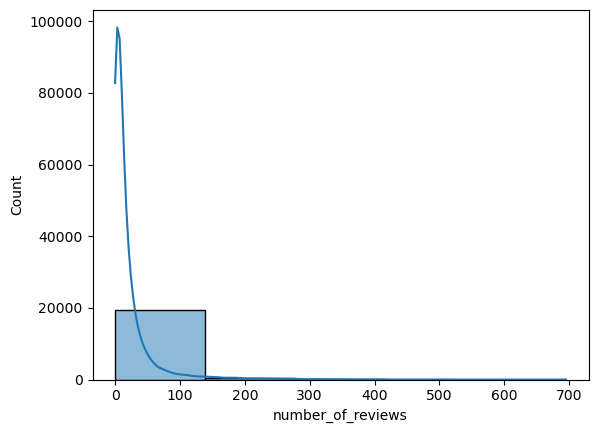

In [24]:
#Use a histogram to visualize the distribution of the variables. . 
#The argument "kde" add a line that encompasses the distribution

sns.histplot(relations['number_of_reviews'], bins = 5, kde = True)

In [25]:
relations.loc[relations['number_of_reviews'] < 5, 'Review count category'] = 'Low review count'

In [26]:
relations.loc[(relations['number_of_reviews'] >= 5) & (relations['number_of_reviews'] < 25), 'Review count category'] = 'Middle review count'

In [27]:
relations.loc[relations['number_of_reviews'] >= 25, 'Review count category'] = 'High review count'

In [28]:
relations['Review count category'].value_counts(dropna = False)

Middle review count    8562
Low review count       7021
High review count      4447
Name: Review count category, dtype: int64

In [29]:
relations.columns

Index(['price', 'number_of_reviews', 'review_scores_rating', 'bathrooms',
       'bedrooms', 'availability_365', 'host_total_listings_count',
       'Review count category'],
      dtype='object')

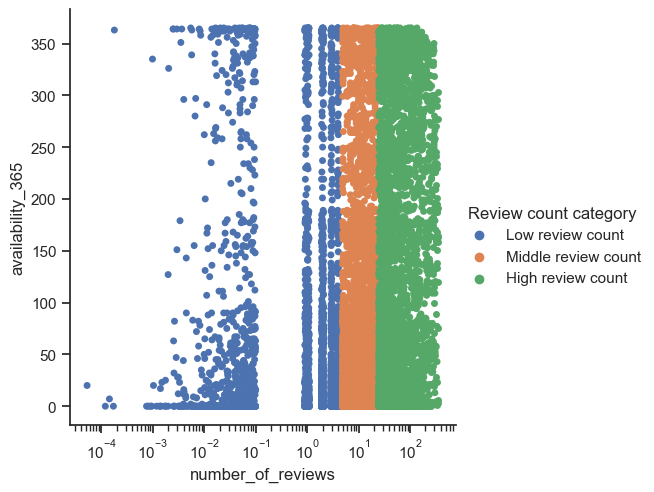

In [30]:
#Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="number_of_reviews", y="availability_365", hue="Review count category", data=relations)
ax = g.axes [0,0]
ax.set_xscale('log')
plt.show()

From this catergorical scatter plot we can see that there is not strong relationship between number of reviews and availability. This reinforces what the correlation coefficient had suggested of a weak relationship between the variables but we also need to note that availability_365 is how many days of the year at the time of data scraping the listing was available so if the relationship was 'positive' that would mean more reviews would result is less bookings. 

In [31]:
# fig = g.get_figure()
g.savefig("categorical plot.png") 

After performing this analysis I was able to answer some of the key questions I had previously asked.
Does price affect availability? Yes to a small extent, there is a weak relationship there; The higher the price the more available a listing is. 
Does price affect reviews (score)? No, price does not seem to affect review score.
Do reviews (score) affect availability? No, there does not seem to be any relationship between these two variables.
Do accomodations (number of bedrooms/bathrooms) affect availability? No, accomodation size does not affect availability.

Hypothesis to be tested: Does lowering the price make listings more likely to be booked/less available?
Do more reviews on a listing cause it to be booked more frequently?

In [32]:
#export cleaned data

relations.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_details_clean_2.csv'), index = False)